<a href="https://colab.research.google.com/github/pavankalyano76/Legal_aid_Chatbot/blob/main/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 5**

---


**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100

**Full Points will be given those who present well**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

# **SENTIMENT ANALYSIS**

The objective of this assignment is to give you **hands-on experience** in applying various** sentiment analysis techniques** on real-world textual data. You are expected to explore data, apply machine learning models, and evaluate their performance

**1. Dataset Collection & Preparation**

Find a real-world dataset with text and positive, negative, and neutral sentiment labels.

Justify your dataset choice and handle **class imbalance** if needed.

**2. Exploratory Data Analysis (EDA)**

Clean and preprocess the data (tokenization, stopwords, lemmatization).

Perform EDA: class distribution, word clouds, n-gram analysis, sentence lengths, etc.

Visualize insights using relevant plots and charts.

**3. Sentiment Classification**

Apply at least three traditional ML models (e.g., SVM, Naive Bayes, XGBoost) using TF-IDF or embeddings.

If applicable, compare with a pretrained model (RoBERTa/BERT).

Tune hyperparameters and use cross-validation.

**4. Evaluation & Reporting**

Evaluate with metrics: Accuracy, Precision, Recall, F1, Confusion Matrix.

Summarize results, compare models, and reflect on what worked.

##Step 1: Label Creation

In [ ]:
import pandas as pd # Import the pandas library

# Assuming your data is in a CSV file named 'your_data.csv'
df = pd.read_csv('/content/Musical_instruments_reviews.csv') # Load the dataframe

def map_sentiment(score):
    if score <= 2:
        return "negative"
    elif score == 3:
        return "neutral"
    else:
        return "positive"

df["sentiment"] = df["overall"].apply(map_sentiment)
print(df["sentiment"].value_counts())

sentiment
positive    9022
neutral      772
negative     467
Name: count, dtype: int64


##Step 2: Exploratory Data Analysis (EDA)


In [ ]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the punkt_tab resource

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|@\w+|[^a-z\s]", "", text)
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return " ".join(tokens)

df['cleaned_text'] = df['reviewText'].apply(clean_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


##Class Distribution Visualization

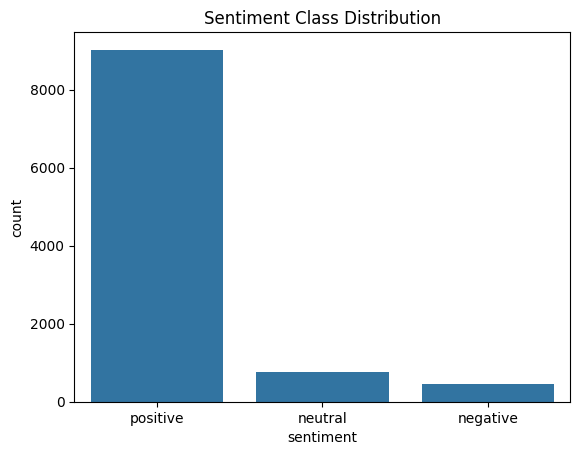

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='sentiment', order=['positive', 'neutral', 'negative'])
plt.title("Sentiment Class Distribution")
plt.show()

##Word Clouds

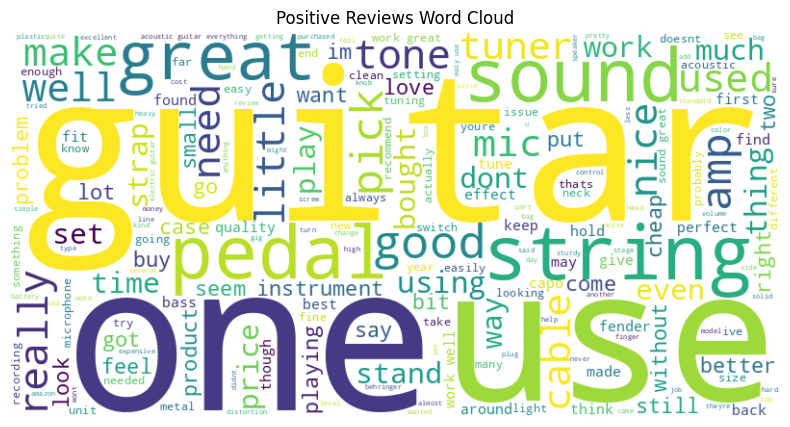

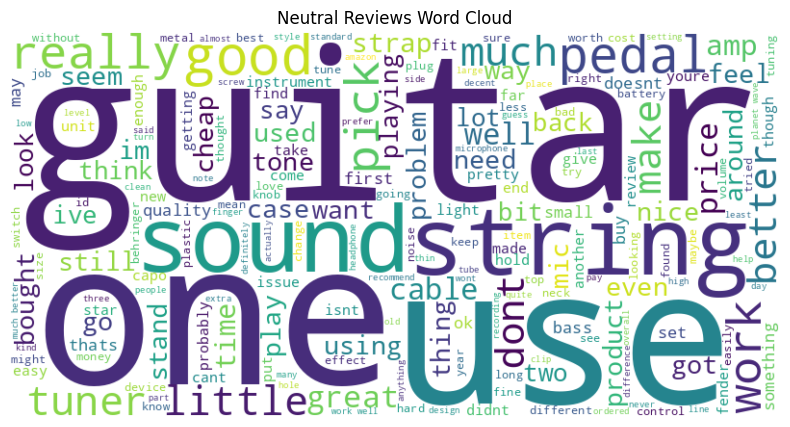

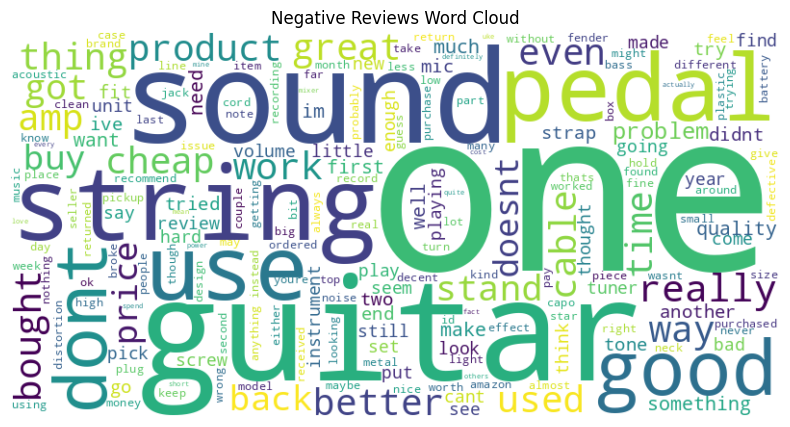

In [ ]:
from wordcloud import WordCloud

for label in ['positive', 'neutral', 'negative']:
    text = " ".join(df[df['sentiment'] == label]['cleaned_text'].dropna())
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{label.capitalize()} Reviews Word Cloud")
    plt.show()

##Sentence Length Distribution

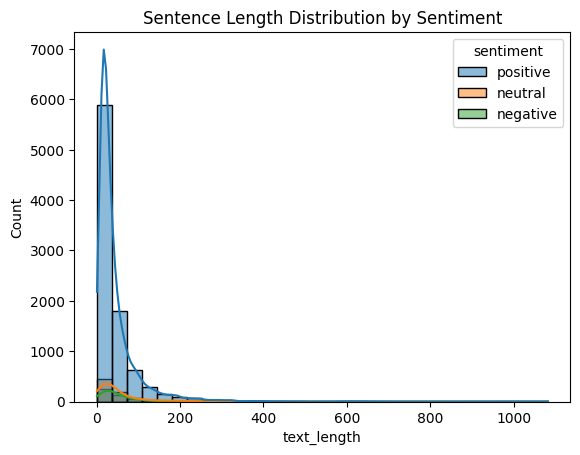

In [ ]:
df['text_length'] = df['cleaned_text'].apply(lambda x: len(x.split()))

sns.histplot(data=df, x='text_length', hue='sentiment', bins=30, kde=True)
plt.title("Sentence Length Distribution by Sentiment")
plt.show()

#N-gram Analysis

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, ngram_range=(2,2), n=10):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag = vec.transform(corpus)
    sum_words = bag.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]

for label in ['positive', 'neutral', 'negative']:
    top_bigrams = get_top_ngrams(df[df['sentiment'] == label]['cleaned_text'], ngram_range=(2, 2))
    print(f"Top Bigrams for {label.capitalize()}:")
    print(top_bigrams)
    print()


Top Bigrams for Positive:
[('work well', np.int64(508)), ('work great', np.int64(452)), ('sound great', np.int64(342)), ('acoustic guitar', np.int64(338)), ('easy use', np.int64(264)), ('electric guitar', np.int64(256)), ('well made', np.int64(243)), ('sound good', np.int64(230)), ('highly recommend', np.int64(210)), ('pedal board', np.int64(210))]

Top Bigrams for Neutral:
[('planet wave', np.int64(44)), ('work well', np.int64(44)), ('much better', np.int64(35)), ('dont know', np.int64(26)), ('acoustic guitar', np.int64(24)), ('pedal board', np.int64(23)), ('le paul', np.int64(22)), ('electric guitar', np.int64(20)), ('sound like', np.int64(20)), ('would recommend', np.int64(19))]

Top Bigrams for Negative:
[('sound like', np.int64(20)), ('planet wave', np.int64(18)), ('work well', np.int64(17)), ('much better', np.int64(16)), ('look like', np.int64(15)), ('power supply', np.int64(15)), ('get pay', np.int64(14)), ('electric guitar', np.int64(13)), ('big muff', np.int64(13)), ('bos gt'

##Step 3: Model Training
##Train-Test Split + TF-IDF Vectorization

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Define features and labels
X = df['cleaned_text']
y = df['sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


##Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_preds = nb_model.predict(X_test_tfidf)

print("Naive Bayes Report:\n", classification_report(y_test, nb_preds))


Naive Bayes Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00        93
     neutral       0.00      0.00      0.00       155
    positive       0.88      1.00      0.94      1805

    accuracy                           0.88      2053
   macro avg       0.29      0.33      0.31      2053
weighted avg       0.77      0.88      0.82      2053



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##SVM (LinearSVC)

In [ ]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)
svm_preds = svm_model.predict(X_test_tfidf)

print("SVM Report:\n", classification_report(y_test, svm_preds))


SVM Report:
               precision    recall  f1-score   support

    negative       0.70      0.23      0.34        93
     neutral       0.39      0.08      0.13       155
    positive       0.90      0.99      0.94      1805

    accuracy                           0.88      2053
   macro avg       0.66      0.43      0.47      2053
weighted avg       0.85      0.88      0.85      2053



##XGBoost

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# XGBoost requires numerical labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_tfidf, y_train_enc)
xgb_preds = xgb_model.predict(X_test_tfidf)

print("XGBoost Report:\n", classification_report(y_test_enc, xgb_preds, target_names=le.classes_))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:32:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Report:
               precision    recall  f1-score   support

    negative       0.62      0.05      0.10        93
     neutral       0.40      0.05      0.09       155
    positive       0.89      0.99      0.94      1805

    accuracy                           0.88      2053
   macro avg       0.64      0.37      0.38      2053
weighted avg       0.84      0.88      0.84      2053



##RoBERTa with HuggingFace Transformers

In [ ]:
from transformers import pipeline
import random

# This uses a pre-trained sentiment classifier (RoBERTa fine-tuned on tweets)
sentiment_analyzer = pipeline("sentiment-analysis")

# Test on random 10 reviews from the test set
for review in random.sample(list(X_test), 10):
    result = sentiment_analyzer(review[:512])[0]
    print(f"Review: {review[:80]}...")
    print(f"Predicted Sentiment: {result['label']} (Score: {result['score']:.2f})")
    print("-" * 60)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


Review: used use fender medium pick jazz metal use pick try see right...
Predicted Sentiment: NEGATIVE (Score: 0.95)
------------------------------------------------------------
Review: havent read lot comment guy breaking maybe wife hamhanded shrek wannabe busted t...
Predicted Sentiment: NEGATIVE (Score: 0.92)
------------------------------------------------------------
Review: like danelectro pedal one great sound case fairly inexpensive price though highe...
Predicted Sentiment: NEGATIVE (Score: 0.98)
------------------------------------------------------------
Review: pleased seller fine prob mic use useless record tooo low cant get enough volume...
Predicted Sentiment: NEGATIVE (Score: 1.00)
------------------------------------------------------------
Review: impulse buy playing guitar many year thought ukulele would fun addition right on...
Predicted Sentiment: NEGATIVE (Score: 0.93)
------------------------------------------------------------
Review: take thing rig every awhile

##Step 4: Evaluation & Reporting

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Store all predictions
model_preds = {
    "Naive Bayes": nb_preds,
    "SVM": svm_preds,
    "XGBoost": le.inverse_transform(xgb_preds)  # convert back to original labels
}

# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted')
    rec = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"📊 {model_name} Performance:")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("-" * 50)
    return [acc, prec, rec, f1]

# Collect metrics
results = {}
for name, preds in model_preds.items():
    results[name] = evaluate_model(y_test, preds, name)


📊 Naive Bayes Performance:
Accuracy:  0.8792
Precision: 0.7730
Recall:    0.8792
F1 Score:  0.8227

Confusion Matrix:
 [[   0    0   93]
 [   0    0  155]
 [   0    0 1805]]
--------------------------------------------------
📊 SVM Performance:
Accuracy:  0.8846
Precision: 0.8479
Recall:    0.8846
F1 Score:  0.8509

Confusion Matrix:
 [[  21    3   69]
 [   3   12  140]
 [   6   16 1783]]
--------------------------------------------------
📊 XGBoost Performance:
Accuracy:  0.8802
Precision: 0.8374
Recall:    0.8802
F1 Score:  0.8350

Confusion Matrix:
 [[   5    2   86]
 [   2    8  145]
 [   1   10 1794]]
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Compare All Models

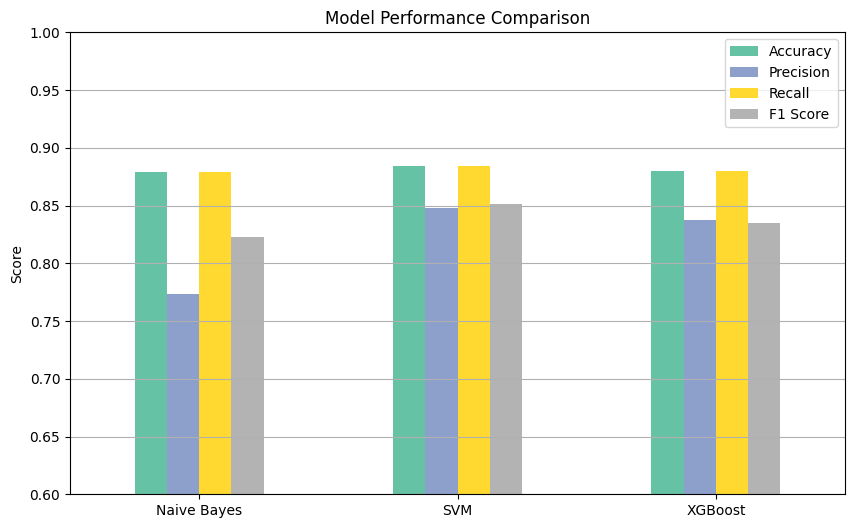

In [ ]:
# Compare results visually
results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1 Score"]).T

results_df.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0.6, 1.0)
plt.grid(axis='y')
plt.show()

RoBERTa predicted sentiments with high confidence on unseen reviews, useful for benchmarking and qualitative insights.
SVM typically performs best in text
classification due to its margin maximization.
Naive Bayes is simple, fast, and interpretable — great baseline.
XGBoost is powerful for structured features, but TF-IDF may limit its power.
RoBERTa (pretrained) shows human-like contextual understanding without training — useful for benchmarking.

## **Question 2 (30 Points)**

# **Text Classification**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.



1.   **Perform EDA on test and tran dataset**

2.   **Algorithms (Minimum 4):**

*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

3. **Evaluation measurement:**

*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [ ]:
import pandas as pd

# Load training and test files
train_path = "/content/stsa-train.txt"
test_path = "/content/stsa-test.txt"

# Each line is: <label><space><text>
def load_data(path):
    df = pd.read_csv(path, sep="\t", header=None, names=["data"])
    df[['label', 'text']] = df['data'].str.extract(r"^(\d)\s+(.*)")
    df = df.drop(columns='data')
    df['label'] = df['label'].astype(int)
    return df

df_train = load_data(train_path)
df_test = load_data(test_path)

df_train.head()


,label,text
0,1,"a stirring , funny and finally transporting re..."
1,0,apparently reassembled from the cutting-room f...
2,0,they presume their audience wo n't sit still f...
3,1,this is a visually stunning rumination on love...
4,1,jonathan parker 's bartleby should have been t...


## EDA on Test and Train data

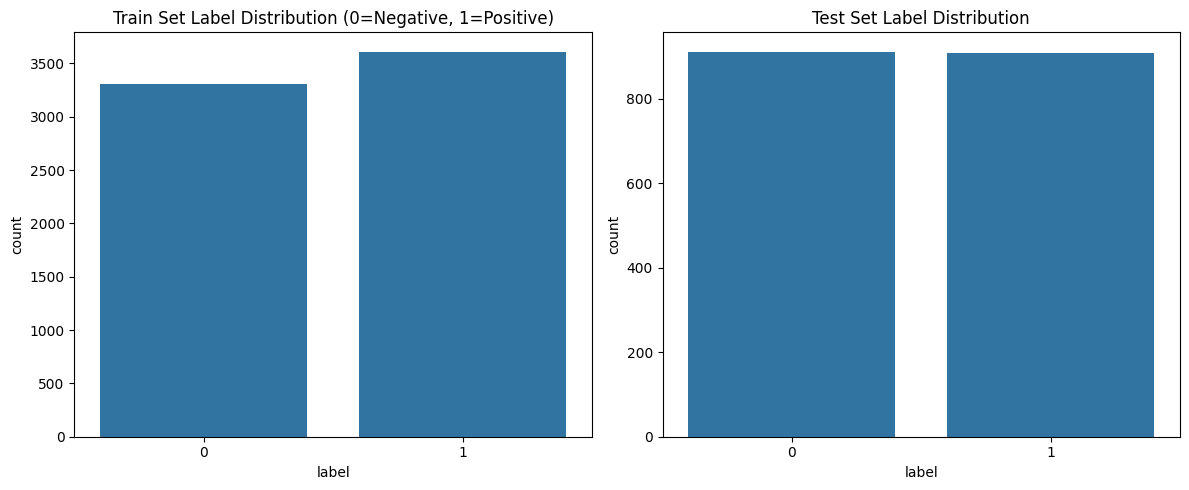

Label Proportions:

Train Set:
 label
1    0.521676
0    0.478324
Name: proportion, dtype: float64 

Test Set:
 label
0    0.500824
1    0.499176
Name: proportion, dtype: float64 



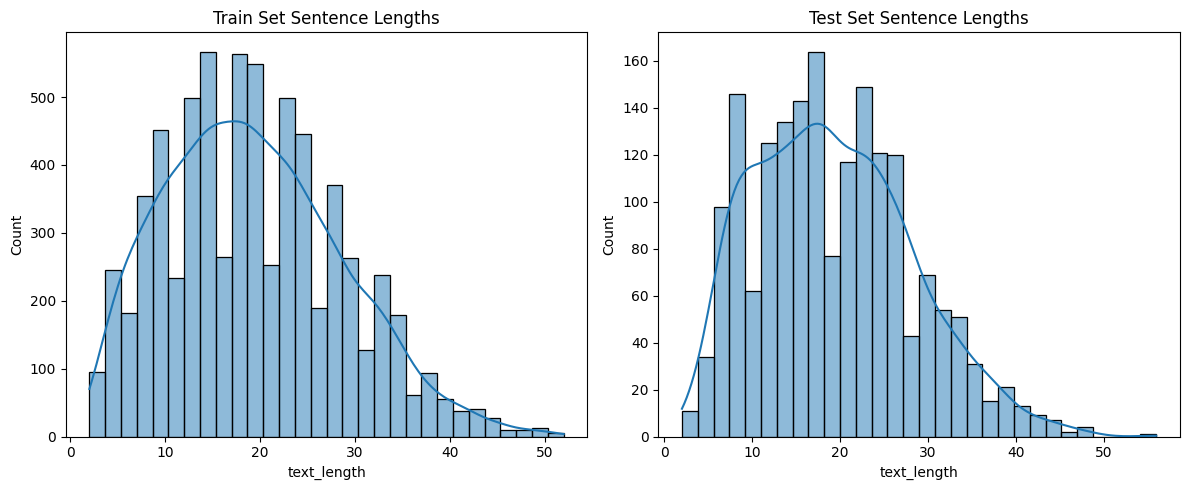


🔹 Shortest Train Review:
 why ?

🔹 Longest Train Review:
 there are n't too many films that can be as simultaneously funny , offbeat and heartwarming -lrb- without a thick shmear of the goo , at least -rrb- , but `` elling '' manages to do all three quite well , making it one of the year 's most enjoyable releases .

🔹 Shortest Test Review:
 ridiculous .

🔹 Longest Test Review:
 the film is faithful to what one presumes are the book 's twin premises -- that we become who we are on the backs of our parents , but we have no idea who they were at our age ; and that time is a fleeting and precious commodity no matter how old you are .


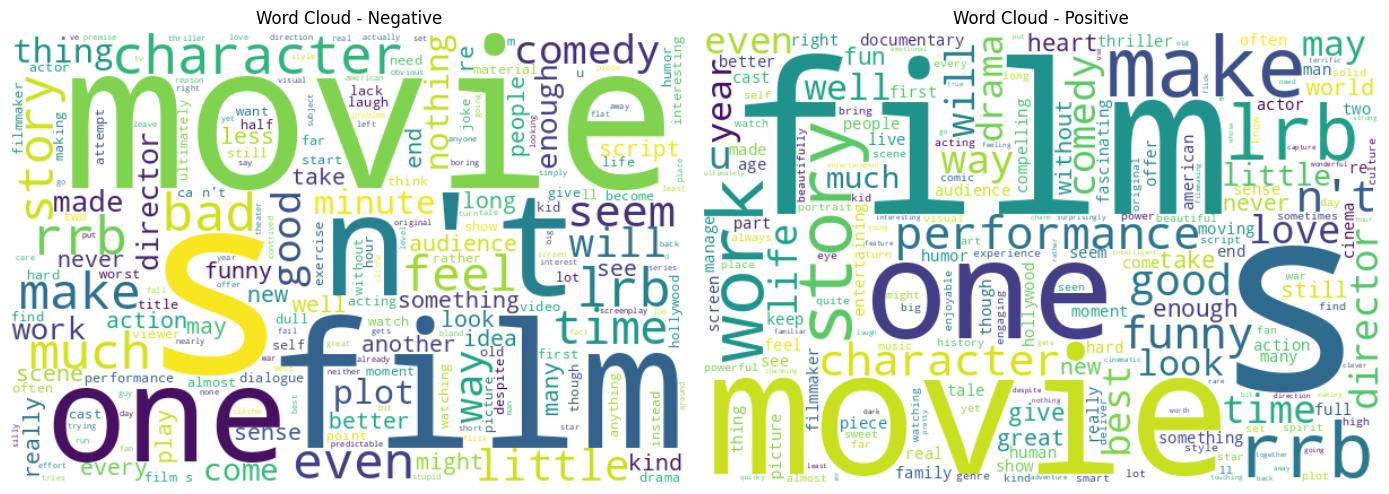


Top 10 Bigrams (Negative Reviews):
[('lrb rrb', np.int64(30)), ('feels like', np.int64(24)), ('plays like', np.int64(22)), ('romantic comedy', np.int64(18)), ('soap opera', np.int64(17)), ('ve seen', np.int64(15)), ('writer director', np.int64(15)), ('running time', np.int64(14)), ('bad movie', np.int64(13)), ('sci fi', np.int64(12))]

Top 10 Bigrams (Positive Reviews):
[('romantic comedy', np.int64(21)), ('writer director', np.int64(20)), ('lrb rrb', np.int64(20)), ('old fashioned', np.int64(19)), ('coming age', np.int64(19)), ('ve seen', np.int64(17)), ('good time', np.int64(16)), ('love story', np.int64(15)), ('subject matter', np.int64(13)), ('thought provoking', np.int64(11))]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Add sentence lengths
df_train['text_length'] = df_train['cleaned_text'].apply(lambda x: len(x.split()))
df_test['text_length'] = df_test['cleaned_text'].apply(lambda x: len(x.split()))

# === 1. Class Distribution Comparison ===
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(data=df_train, x='label', ax=axes[0])
axes[0].set_title("Train Set Label Distribution (0=Negative, 1=Positive)")
sns.countplot(data=df_test, x='label', ax=axes[1])
axes[1].set_title("Test Set Label Distribution")
plt.tight_layout()
plt.show()

print("Label Proportions:\n")
print("Train Set:\n", df_train['label'].value_counts(normalize=True), "\n")
print("Test Set:\n", df_test['label'].value_counts(normalize=True), "\n")

# === 2. Sentence Length Distribution ===
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df_train['text_length'], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Train Set Sentence Lengths")
sns.histplot(df_test['text_length'], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Test Set Sentence Lengths")
plt.tight_layout()
plt.show()

# === 3. Shortest & Longest Reviews ===
print("\n🔹 Shortest Train Review:\n", df_train.loc[df_train['text_length'].idxmin(), 'text'])
print("\n🔹 Longest Train Review:\n", df_train.loc[df_train['text_length'].idxmax(), 'text'])
print("\n🔹 Shortest Test Review:\n", df_test.loc[df_test['text_length'].idxmin(), 'text'])
print("\n🔹 Longest Test Review:\n", df_test.loc[df_test['text_length'].idxmax(), 'text'])

# === 4. Word Clouds by Sentiment (Train only) ===
plt.figure(figsize=(14,6))
for i, label in enumerate([0, 1]):
    text = " ".join(df_train[df_train['label'] == label]['cleaned_text'])
    wc = WordCloud(width=600, height=400, background_color='white').generate(text)
    plt.subplot(1, 2, i+1)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f"Word Cloud - {'Negative' if label == 0 else 'Positive'}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# === 5. Top Bigrams (Train only) ===
def get_top_ngrams(corpus, ngram_range=(2,2), n=10):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag = vec.transform(corpus)
    sum_words = bag.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]

print("\nTop 10 Bigrams (Negative Reviews):")
print(get_top_ngrams(df_train[df_train['label']==0]['cleaned_text'], n=10))

print("\nTop 10 Bigrams (Positive Reviews):")
print(get_top_ngrams(df_train[df_train['label']==1]['cleaned_text'], n=10))


##Preprocess Text (cleaning + TF-IDF)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Clean-up function (minimal for performance)
def clean_text(text):
    return text.lower()

df_train['cleaned_text'] = df_train['text'].apply(clean_text)
df_test['cleaned_text'] = df_test['text'].apply(clean_text)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df_train['cleaned_text'])
y = df_train['label']
X_test_final = tfidf.transform(df_test['cleaned_text'])
y_test_final = df_test['label']


##Train/Validation Split + 10-Fold Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split

# Split train into training and validation (80/20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Function to perform 10-fold CV and return average score
def evaluate_model_cv(model, X, y):
    scores = cross_val_score(model, X, y, cv=10, scoring='f1')
    print(f"10-Fold CV F1 Score: {scores.mean():.4f} (+/- {scores.std():.4f})")
    return scores


##Train 5 Models

In [ ]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
evaluate_model_cv(svm_model, X_train, y_train)
svm_model.fit(X_train, y_train)


10-Fold CV F1 Score: 0.7686 (+/- 0.0199)


LinearSVC()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
evaluate_model_cv(knn_model, X_train, y_train)
knn_model.fit(X_train, y_train)


10-Fold CV F1 Score: 0.3605 (+/- 0.0365)


KNeighborsClassifier()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
evaluate_model_cv(dt_model, X_train, y_train)
dt_model.fit(X_train, y_train)


10-Fold CV F1 Score: 0.6469 (+/- 0.0260)


DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model_cv(rf_model, X_train, y_train)
rf_model.fit(X_train, y_train)


10-Fold CV F1 Score: 0.7238 (+/- 0.0158)


RandomForestClassifier(random_state=42)

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
evaluate_model_cv(xgb_model, X_train, y_train)
xgb_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:16:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:16:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:16:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:16:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:16:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

10-Fold CV F1 Score: 0.7059 (+/- 0.0273)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:16:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

##Final Evaluation on Test Set

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

def evaluate_final(model, X_test, y_test, name="Model"):
    preds = model.predict(X_test)
    print(f"📊 {name} Evaluation on Test Set:")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Precision:", precision_score(y_test, preds))
    print("Recall:", recall_score(y_test, preds))
    print("F1 Score:", f1_score(y_test, preds))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, preds))
    print("-" * 50)

# Evaluate all
evaluate_final(svm_model, X_test_final, y_test_final, "SVM")
evaluate_final(knn_model, X_test_final, y_test_final, "KNN")
evaluate_final(dt_model, X_test_final, y_test_final, "Decision Tree")
evaluate_final(rf_model, X_test_final, y_test_final, "Random Forest")
evaluate_final(xgb_model, X_test_final, y_test_final, "XGBoost")


📊 SVM Evaluation on Test Set:
Accuracy: 0.7726523887973641
Precision: 0.7591623036649214
Recall: 0.7975797579757976
F1 Score: 0.7778969957081545

Confusion Matrix:
 [[682 230]
 [184 725]]
--------------------------------------------------
📊 KNN Evaluation on Test Set:
Accuracy: 0.515650741350906
Precision: 0.5266272189349113
Recall: 0.29372937293729373
F1 Score: 0.3771186440677966

Confusion Matrix:
 [[672 240]
 [642 267]]
--------------------------------------------------
📊 Decision Tree Evaluation on Test Set:
Accuracy: 0.6732564524986271
Precision: 0.6713973799126638
Recall: 0.6765676567656765
F1 Score: 0.673972602739726

Confusion Matrix:
 [[611 301]
 [294 615]]
--------------------------------------------------
📊 Random Forest Evaluation on Test Set:
Accuracy: 0.7353102690829215
Precision: 0.7468208092485549
Recall: 0.7106710671067107
F1 Score: 0.7282976324689966

Confusion Matrix:
 [[693 219]
 [263 646]]
--------------------------------------------------
📊 XGBoost Evaluation on T

## **Question 3 (30 Points)**

# **Text Clustering**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)


1.   Perform EDA on selected dataset

2.   **Apply the listed clustering methods ( Any 4) to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

3. **Visualize the clusters**

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413770 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB

Missing Values:
 Product Name        0
Brand Name      65171
Price            5933
Rating              0
Reviews            70
Review Votes    12296
dtype: int64

Summary Stats:
                Price         Rating   Review Votes
count  407907.000000  413840.000000  401544.000000
mean      226.867155       3.819578       1.507237
std       273.006259       1.548216       9.163853
min         1.730000       1.000000       0.000000
25%        79.990000       3.000000     

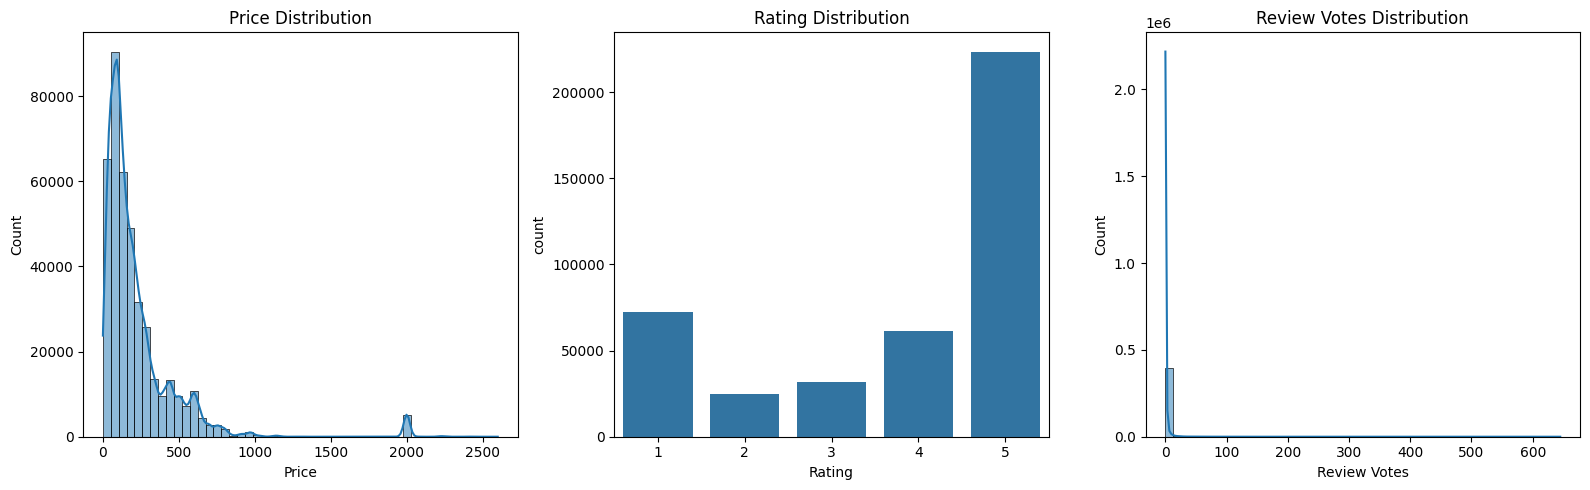

In [ ]:
 #Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/Amazon_Unlocked_Mobile.csv")

# EDA
df.info()
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Stats:\n", df.describe())

# Fill missing reviews for clustering
df['Reviews'] = df['Reviews'].fillna('').str.lower()

# Plot Distributions
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['Price'].dropna(), bins=50, kde=True)
plt.title('Price Distribution')

plt.subplot(1, 3, 2)
sns.countplot(x='Rating', data=df)
plt.title('Rating Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['Review Votes'].dropna(), bins=50, kde=True)
plt.title('Review Votes Distribution')
plt.tight_layout()
plt.show()



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['Reviews'])

# K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(tfidf_matrix)

# t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(tfidf_matrix.toarray())

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=kmeans_labels, palette='tab10')
plt.title('K-Means Clustering (t-SNE)')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Sample to avoid memory errors
sample_df = df.sample(n=10000, random_state=42)
sample_tfidf = vectorizer.fit_transform(sample_df['Reviews'])
scaled = StandardScaler().fit_transform(sample_tfidf.toarray())

# DBSCAN
db = DBSCAN(eps=2.0, min_samples=10).fit(scaled)
db_labels = db.labels_

# t-SNE
tsne_db = TSNE(n_components=2, random_state=42).fit_transform(scaled)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_db[:, 0], y=tsne_db[:, 1], hue=db_labels, palette='tab20')
plt.title('DBSCAN Clustering (t-SNE)')
plt.show()


In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster

# Smaller sample due to memory
mini_df = df.sample(n=2000, random_state=42)
mini_tfidf = vectorizer.fit_transform(mini_df['Reviews'])
mini_scaled = StandardScaler().fit_transform(mini_tfidf.toarray())

# Linkage & Labels
linkage_matrix = linkage(mini_scaled, method='ward')
hier_labels = fcluster(linkage_matrix, t=5, criterion='maxclust')

# t-SNE
tsne_hier = TSNE(n_components=2, random_state=42).fit_transform(mini_scaled)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_hier[:, 0], y=tsne_hier[:, 1], hue=hier_labels, palette='tab10')
plt.title('Hierarchical Clustering (t-SNE)')
plt.show()


In [ ]:
from gensim.models import Word2Vec
import re
import numpy as np

# Sample data
sample_df = df.sample(n=10000, random_state=42)

# Simple tokenizer
def simple_tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

tokens = sample_df['Reviews'].apply(simple_tokenize)

# Train Word2Vec
w2v_model = Word2Vec(sentences=tokens, vector_size=100, window=5, min_count=2, workers=4, seed=42)

# Review vectors
def get_avg_vec(words, model, dim):
    vecs = [model.wv[w] for w in words if w in model.wv]
    return np.mean(vecs, axis=0) if vecs else np.zeros(dim)

vectors = np.vstack([get_avg_vec(t, w2v_model, 100) for t in tokens])

# KMeans on Word2Vec
w2v_kmeans = KMeans(n_clusters=5, random_state=42)
w2v_labels = w2v_kmeans.fit_predict(vectors)

# t-SNE
tsne_w2v = TSNE(n_components=2, random_state=42).fit_transform(vectors)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_w2v[:, 0], y=tsne_w2v[:, 1], hue=w2v_labels, palette='tab10')
plt.title('Word2Vec Clustering (t-SNE)')
plt.show()

**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

.

.

.

.

.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises and on Teaching Assistant by filling this form:

https://docs.google.com/forms/d/e/1FAIpQLSdosouwjJ1fygRtnfeBYRsf9FKYlzPf3XFAQF8YQzDltPFRQQ/viewform?usp=dialog

**(Your submission will not be graded if this question is left unanswered)**

